## Trabajo Visualización de datos UDD:

Objetivos:


Alumnos:

| Alumno | Email |
|--------|-------|
|Carolina Hoffman | chofmman@udd.cl |
|Wilder Prado     | wilderhp@gmail.com |
|Effry Vigorena   | effryvg@gmail.com |
|Felipe Guzmán    | felipeguzmanv@gmail.com|





In [1]:
## Librerias

import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from matplotlib.patches import ConnectionPatch
from matplotlib.text import OffsetFrom
import matplotlib.image as image



import plotly as px
import plotly.graph_objs as go
import plotly.express as px
import ipywidgets as widgets
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings('ignore')




In [2]:
## Data a utilizar

'''
Archivos de mapa (shape)
'''
chile_pol = gpd.read_file('../shape_chile/chile_pol_join_8_16.shp')
'''
Archivos de Vitamina D
'''
#data = pd.read_csv("DATOS ADD_VISUALIZACION.CSV", decimal=',')
data = pd.read_csv("https://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv",sep=';', decimal=',')
#datahttps://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv



I. Revisión de Datos por estaciones

In [3]:
data.columns = data.columns.str.upper()
#data.head(5)

Grafico_estaciones=data[['AÑO','ESTACIONES_AÑO','VITAMINA D']]#list(Grafico_wpp)
Grafico_estaciones=Grafico_estaciones.groupby(['AÑO','ESTACIONES_AÑO']).agg({'VITAMINA D':'mean'})

Grafico_estaciones=Grafico_estaciones.reset_index()
# Grafico_estaciones

CONDICIONES=[Grafico_estaciones['ESTACIONES_AÑO']=='VERANO',
             Grafico_estaciones['ESTACIONES_AÑO']=='OTOÑO',
             Grafico_estaciones['ESTACIONES_AÑO']=='INVIERNO',
             Grafico_estaciones['ESTACIONES_AÑO']=='PRIMAVERA'           
            ]
RESPUESTA=[1,2,3,4]
Grafico_estaciones['ESTACIONES_ORDEN']=np.select(CONDICIONES,RESPUESTA)
# Grafico_estaciones
Grafico_estaciones=Grafico_estaciones.sort_values(by=['AÑO','ESTACIONES_ORDEN'],ascending=[True,True])
Grafico_estaciones=Grafico_estaciones.loc[:,['AÑO','ESTACIONES_AÑO','VITAMINA D']]


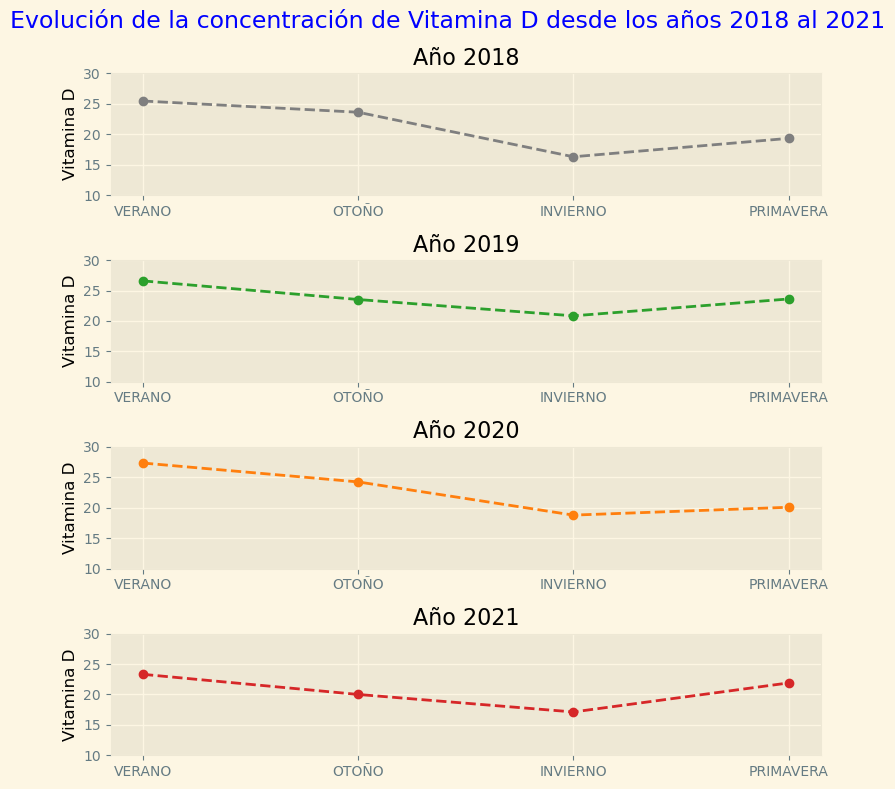

In [4]:
with plt.style.context('Solarize_Light2'): #dark_background
    fig, ax = plt.subplots(4, 1,figsize=(8,8),sharey = True, constrained_layout=True, )
    #plt.ylabel('vitamina D (ng/mL)')
#a=np.linspace(0,10,10)
    Estaciones = ['VERANO', 'OTOÑO', 'INVIERNO', 'PRIMAVERA']
    Vitamina_D = {'2018':Grafico_estaciones.iloc[:4,2:], '2019':Grafico_estaciones.iloc[4:8,2:],
                    '2020':Grafico_estaciones.iloc[8:12,2:], '2021':Grafico_estaciones.iloc[12:16,2:]}

    ax[0].plot(Estaciones, Vitamina_D['2018'], color = 'tab:grey', marker='o', linestyle='dashed')
    ax[1].plot(Estaciones, Vitamina_D['2019'], color = 'tab:green',marker='o',linestyle='dashed')
    ax[2].plot(Estaciones, Vitamina_D['2020'], color = 'tab:orange',marker='o',linestyle='dashed')
    ax[3].plot(Estaciones, Vitamina_D['2021'], color = 'tab:red',marker='o',linestyle='dashed')
    ax[0].set_title("Año 2018")
    ax[1].set_title("Año 2019")
    ax[2].set_title("Año 2020")
    ax[3].set_title("Año 2021")
#ax[0,0]annotate(EstacionesVitamina_D['2018']=(8, 0))
# ax.annotate("Sine", xy=(8, 0),
# xycoords='data', xytext=(10.5, 0),
# textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),)
#ax.set_xlim(0, 4)
#ax[0,0].xaxis.grid
    ax[0].set_ylim(10, 30)
    ax[0].set_ylabel('Vitamina D', color='black')
    ax[1].set_ylabel('Vitamina D', color='black')
    ax[2].set_ylabel('Vitamina D', color='black')
    ax[3].set_ylabel('Vitamina D', color='black')
    
    
#ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
#ax.legend(loc = 'upper right')
    plt.suptitle('Evolución de la concentración de Vitamina D desde los años 2018 al 2021',fontsize=17, color='b')
    
    fig.tight_layout()
plt.show()

II. Visualización de mapa

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv",sep=';', decimal=',')

In [6]:
# Colores a ocupar en Macrozonas:
color=['#C62828', '#C62828', '#283593', '#FF9800', '#283593', '#C62828', '#283593',]
# colores Anios
color_anios = ['#CFD8DC','#419D57','#FBC599','#FF3333']

In [7]:
## orden de norte a sur
index_=[15,1,2,3,4,5,13,6,7,8,9,14,10]

In [8]:
## Limpieza de datos mapa
## Rotación del mapa
center = chile_pol["geometry"].iloc[0].centroid
chile_pol.geometry = chile_pol.rotate(96, origin=center)
chile_pol['centroide'] = chile_pol.geometry.centroid
chile_pol['X']= chile_pol.centroide.x
chile_pol['Y']= chile_pol.centroide.y

## Asignación de colores mapa

chile_pol['color'] = chile_pol.MacroZona.map(lambda x: color[x-1])
## Orden de norte a sur
chile_pol.codreg=chile_pol.codreg.astype(int)

# chile_pol.head(2)

In [9]:
## Preparación de data para grafico de tendencia

nombres = {
   ' SANTIAGO': 'Región Metropolitana de Santiago',
   ' LA SERENA':'Región de Coquimbo',
   ' VALDIVIA': 'Región de Los Ríos',
   ' ANTOFAGASTA': 'Región de Antofagasta',
   ' PUERTO MONTT': 'Región de Los Lagos',
   ' ILLAPEL':'Región de Coquimbo',
   ' RANCAGUA':"Región del Libertador General Bernardo O'Higgins",
   ' CONCEPCION': 'Región del Biobío',
   ' OVALLE':'Región de Coquimbo',
   ' LOS ANDES': 'Región de Valparaíso',
   ' VIÑA DEL MAR':'Región de Valparaíso',
   ' VALLENAR':'Región de Atacama',
   ' TEMUCO':'Región de La Araucanía',
   ' COPIAPO':'Región de Atacama',
   ' ARICA':'Región de Arica y Parinacota',
   ' CALAMA':'Región de Antofagasta', 
   ' IQUIQUE':'Región de Tarapacá',
   'TALCA': 'Región del Maule'
}
codigos = {
   ' SANTIAGO': 13,
   ' LA SERENA':4,
   ' VALDIVIA': 14,
   ' ANTOFAGASTA': 2,
   ' PUERTO MONTT': 10,
   ' ILLAPEL':4,
   ' RANCAGUA':6,
   ' CONCEPCION': 8,
   ' OVALLE':4,
   ' LOS ANDES': 5,
   ' VIÑA DEL MAR':5,
   ' VALLENAR':3,
   ' TEMUCO':9,
   ' COPIAPO':3,
   ' ARICA':15,
   ' CALAMA':2, 
   ' IQUIQUE':1,
   'TALCA': 7
}
data_ = data
data_['nom_reg'] = data_.LABORATORIO.map(lambda x: nombres.get(x))
data_['cod_reg'] = data_.LABORATORIO.map(lambda x: codigos.get(x))

data__ = data_.pivot_table(index='nom_reg',columns='Año', values='VITAMINA D', aggfunc={'VITAMINA D':np.mean}).reset_index().set_index('nom_reg')
data__ = pd.merge(data__, chile_pol[['nom_reg','codreg','X']], how='left', left_on='nom_reg', right_on='nom_reg')
data__=data__.set_index('codreg')
data__=data__.loc[index_,:]


data_plot =data__[['X',2018,2019,2020,2021]].set_index('X').unstack().reset_index().rename(columns={'level_0':'Año',0:'Promedio'})
data_plot = pd.merge(
    left = data_plot,
    right = chile_pol[['X','Y']],
    left_on = 'X',
    right_on= 'X',
    how='left'
)

temperaturas = pd.read_csv('../shape_chile/temperatura/mediaxregion.csv', names = [
 'Año',
 'estaciones',
 'promedio_temp'
  ], skiprows=1)

temperaturas = temperaturas.reset_index()
data_plot = data_plot.reset_index()
data_plot = pd.merge(
    left= data_plot,
    right = temperaturas, 
    left_on = 'index',
    right_on = 'index',
    how='left'
)
data_plot = data_plot[['Año_x', 'X', 'Promedio', 'Y', 'promedio_temp']]
data_plot = data_plot.rename(columns={

    'Año_x' : 'Año'
    
})
data_plot = pd.merge(
    left= data_plot,
    right= chile_pol[['nom_reg', 'X', 'codreg']],
    left_on = 'X',
    right_on = 'X'
)
temperaturas_prom = data_plot[['codreg', 'promedio_temp']].groupby(by=['codreg']).agg('mean','promedio_temp').reset_index()
temperaturas_prom = temperaturas_prom.set_index('codreg')
# temperaturas_prom = temperaturas_prom.set_index('codreg')
temperaturas_prom = temperaturas_prom.loc[index_,:].reset_index()

## calculo de los promedios de vitamina D
vitamina_d_promedio_reg = data_plot[['codreg','Promedio']].groupby(by='codreg').agg('mean','Promedio').to_dict()
chile_pol['promedio_vitamina_d'] = chile_pol.codreg.map(lambda x: vitamina_d_promedio_reg['Promedio'].get(x))

def clasificacion(x):
    val=''
    if (x > 0 and x < 19.95): val='#ffffd4'
    elif (x>=19.95 and x< 20.26): val = '#fed98e' 
    elif (x>=20.26 and x<21.32): val = '#fe9929' 
    elif (x>=21.32 and x<22.29): val = '#d95f0e'
    elif (x>=22.29 and x<=24): val = '#993404'
    return val
chile_pol['categorias']= chile_pol.promedio_vitamina_d.map(lambda x: clasificacion(x))

# chile_pol.loc[chile_pol['codreg']==16, 'categorias'] ='#ffffd4'
chile_pol.loc[chile_pol['codreg']==12, 'categorias'] ='#EEEEEE'
chile_pol.loc[chile_pol['codreg']==11, 'categorias'] ='#EEEEEE'

romanos_reg = {
    8:'VIII',
    1: 'I',
    2: 'II',
    3: 'III',
    4: 'IV',
    5: 'V',
    6: 'VI',
    7: 'VII',
    9: 'XIV',
    10: 'X',
    11: 'XI',
    12: 'XII',
    13: 'XIII',
    14: 'XIV',
    15: 'XV'
}

data_plot['romanos'] = data_plot.codreg.map(lambda x: romanos_reg.get(x))

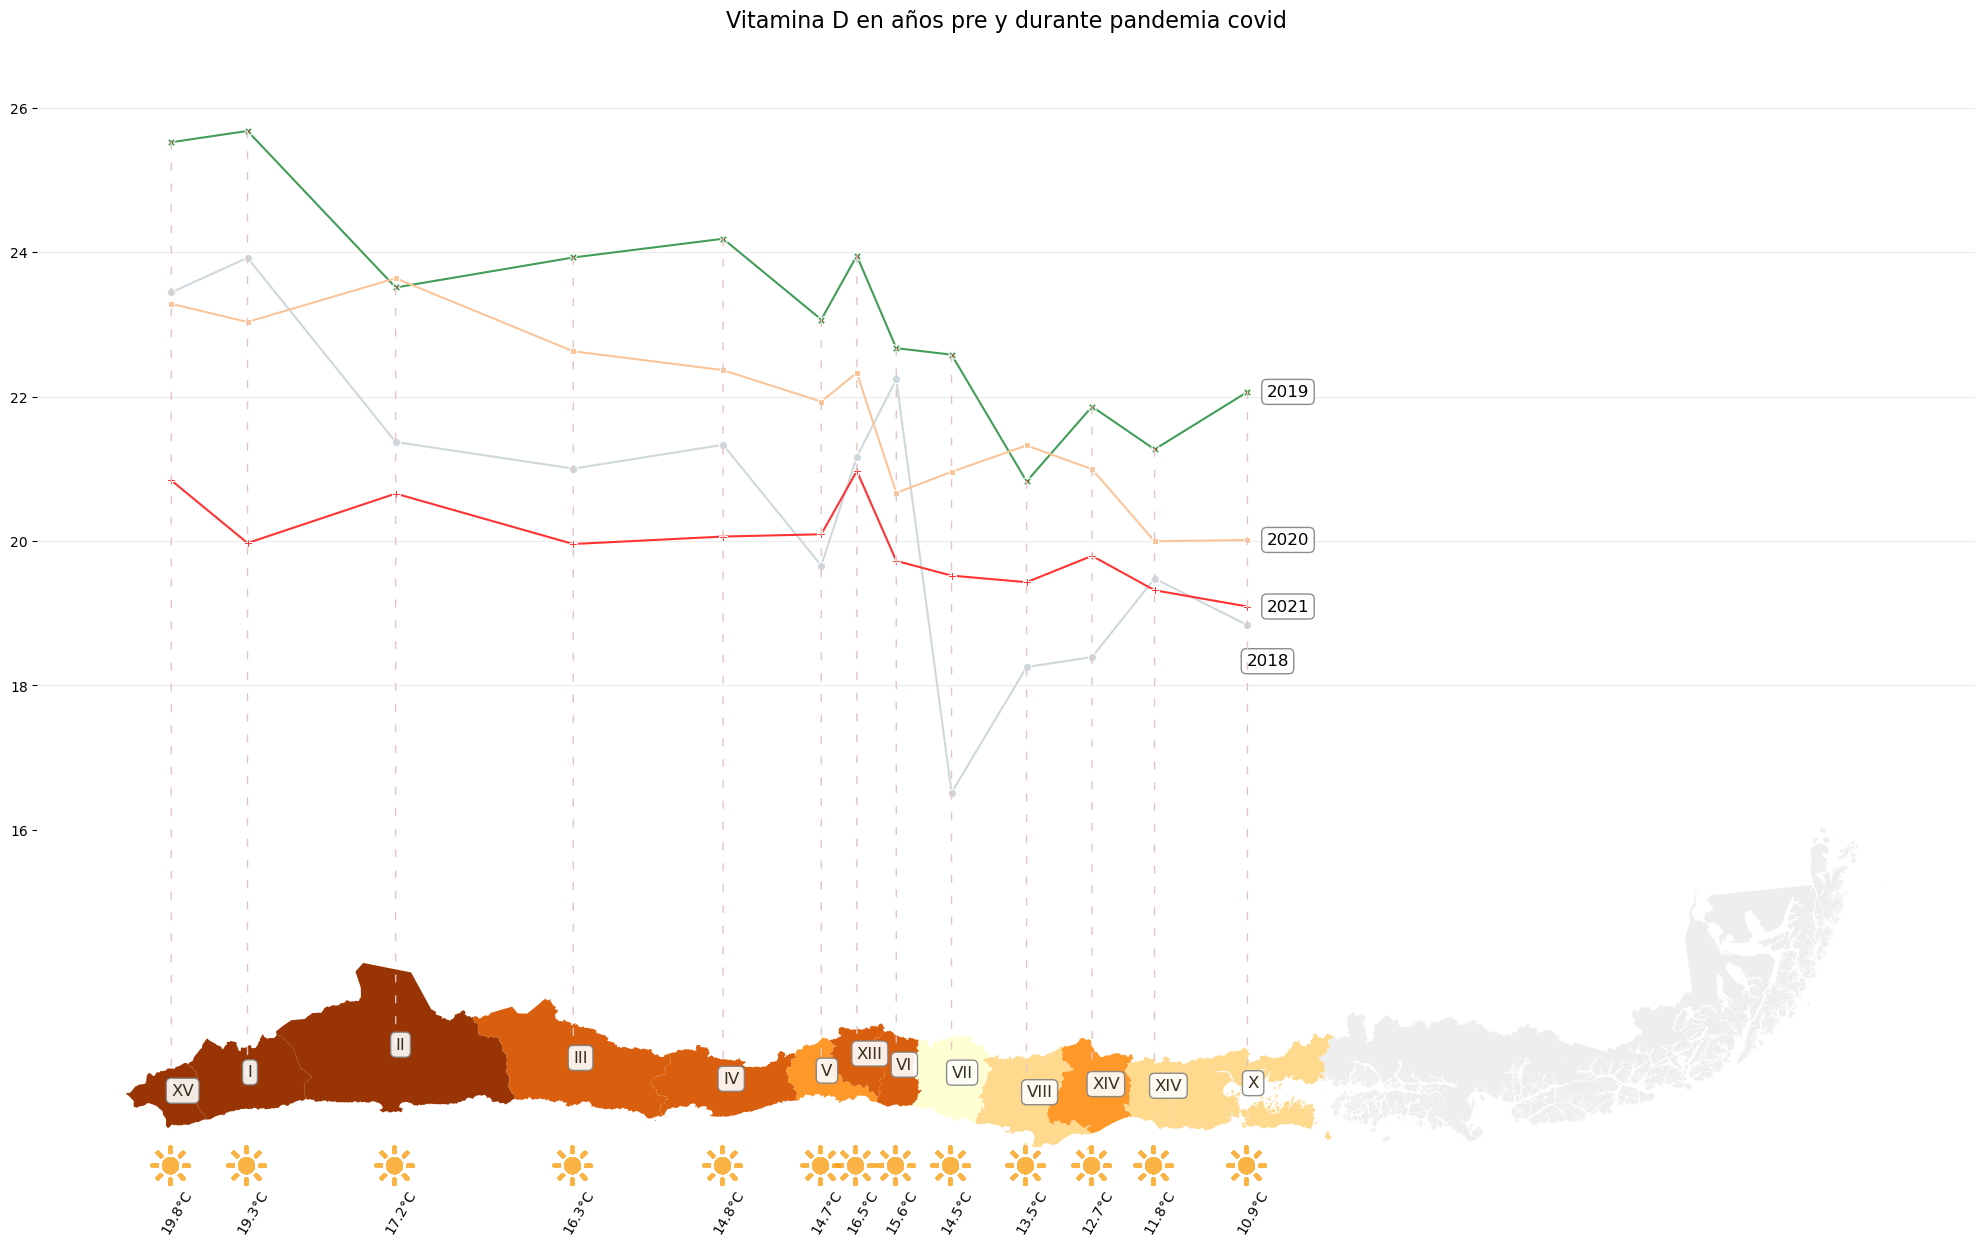

In [10]:
image_ = image.imread('../shape_chile/sol.png')
imagebox = OffsetImage(image_, zoom = 0.05)
fig, ax = plt.subplots(2,1, figsize=(25,18), sharex='all', gridspec_kw={'hspace': -.4})

ax[0]=sns.lineplot(
    data= data_plot,
    x='X',
    y='Promedio',
    hue='Año',
    ax=ax[0],
    markers=True,
    dashes=False,
    style='Año',
    palette=color_anios,
    legend=False,

    
)
ax[0].set_title("Vitamina D en años pre y durante pandemia covid", fontsize=16)
ax[0].spines['left'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set(ylabel=None)
ax[0].set(xlabel=None)
# x_min, x_max = ax[0].get_xlim()
# ax[0].set_xlim(x_min,x_max+4)




# chile_pol[~chile_pol['codreg'].isin([12,11])].plot(column='MacroZona', 
chile_pol.plot(
    column='promedio_vitamina_d', 
    #categorical=True,
    ax=ax[1],
    # color=chile_pol[~chile_pol['codreg'].isin([12,11])]['categorias'],    
    color=chile_pol['categorias'],    
    # column='promedio_vitamina_d',
    # scheme = 'Fisher_Jenks',
    # k=5,
     # scheme='Fisher_Jenks',
    # cmap='Oranges_r',
    legend=True
   

)



ax[0].set_ylim(15,27)
y_limin,ylimax= ax[1].get_ylim()
# ax[1].set_ylim(y_limin-1,ylimax)

label_anios = data_plot.loc[data_plot.codreg==10,['Año','codreg','Promedio','X','Y']].reset_index()
for i in range(len(label_anios)):
    # print((label_anios.loc[i,'X'],label_anios.loc[i,'Promedio']))
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
   
    if label_anios.loc[i,'Año']==2018:
        ax[0].text(label_anios.loc[i,'X']+49000,label_anios.loc[i,'Promedio']-.5, str(label_anios.loc[i,'Año']), ha="center", va="center", size=12,
        bbox=bbox_props)
    else:
        ax[0].text(label_anios.loc[i,'X']+99000,label_anios.loc[i,'Promedio'], str(label_anios.loc[i,'Año']), ha="center", va="center", size=12,
        bbox=bbox_props)

anio_ = 2019
for xpy in zip(data_plot[data_plot['Año']==anio_]['X'],data_plot[data_plot['Año']==anio_]['Promedio'],data_plot[data_plot['Año']==anio_]['Y'],temperaturas_prom['promedio_temp'],data_plot[data_plot['Año']==anio_]['romanos']):
    # print(xpy[0], xpy[0]-1000)
    ax[0].plot(xpy[0],xpy[1],'ro',markersize=.5)   
    # ax[1].plot(xpy[0],xpy[2],'ro',markersize=8)   
    ax[1].text(xpy[0],xpy[2],s=xpy[4], size=12, color='#39311d', bbox=bbox_props)#, fontweight='bold', )
    ax[1].text((xpy[0]-29999),5545389.992777139,s=f'{xpy[3]:.1f}°C', rotation=60)
    #ax[1].text((xpy[0]-29999),6632454.265839104,s=f'{xpy[3]:.1f}°C', rotation=45)
    ab = AnnotationBbox(imagebox, (xpy[0], 5706728.349250345), frameon = False)
    ax[1].add_artist(ab)
    # print(xpy[2]-399999)
    # ax[1].text(xpy[0],xpy[2]-299999, s='AAAAA')
    
    con = ConnectionPatch(xyA=(xpy[0],xpy[1]), xyB=(xpy[0],xpy[2]), coordsA="data", coordsB="data",
          axesA=ax[0], axesB=ax[1], color="#E5C3C3", linestyle=(0, (5, 10)))
    ax[1].add_artist(con)  
    # print(i)


# ax[0].set(xlabel=)
# ax[0].get_xaxis().set_visible(True)
ax[1].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

ax[0].get_xaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

# ax[1].get_yaxis().set_visible(True)
# ax[1].axis('off')
# ax[0].axis('on')sol

ax[0].grid(axis='y', color='#ECECEC')

# leg = ax[1].get_legend()
# print(leg)
# leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))
# ax.set_axis_off()
# plt.tight_layout()
plt.show()

III. Visualización sunburst

In [11]:
## Funciones a ocupar
def agregar_proporcion(grupo):    
    grupo["PROP"] = grupo['VITAMINA D'] / grupo['VITAMINA D'].sum()
    return grupo
    
def condicion(x):
    x=int(x)
    if x<30:
        return "Deficiente"
    else:
        return "Deseable"


def update_treemap(tipo,zona):
  global df_filter  
 
  if zona !="ALL":
    df = df_filter.query(f"MACROZONA == '{zona.upper()}'")
  else:
    df = df_filter
    
  if tipo =="MEAN":
    val='VITAMINA_D_AVG'
    txt="GRAFICO TREEMAP - MEAN VITAMINA D"
  else:
    val='VITAMINA_D_TOT'
    txt="GRAFICO TREEMAP - SIZE VITAMINA D"
  
  

  fig = px.treemap(df, values=val,path = [px.Constant(txt),'AÑO','MACROZONA','ESTACIONES_AÑO','VIT_D_TXT'],
                color='VIT_D_TXT', 
                color_discrete_map={'Deficiente':'#ce281f',
                                     'Deseable':'#8eef44'}                
                 )
  cm = {txt:"#f2f6fa"}

  fig.for_each_trace(
    lambda t: t.update(
        marker_colors=[
            cm[id.split("/")[0]] if len(id.split("/")) == 1 else c
            for c, id in zip(t.marker.colors, t.ids)
          ]        
      )
    )
  
  cm = {
    "2018":"#ec722e",
    "2019":"#7dc343",
    "2020":"#64a2d8",
    "2021":"#eed842"
  }

  fig.for_each_trace(
    lambda t: t.update(
        marker_colors=[
            cm[id.split("/")[1]] if len(id.split("/")) == 2 else c
            for c, id in zip(t.marker.colors, t.ids)
          ]        
      )
    )

  cm = {
    "NORTE": "#e6dc77",
    "CENTRO": "#b8d6b1",
    "SUR": "#64aee5"
  }

  fig.for_each_trace(
    lambda t: t.update(
        marker_colors=[
            cm[id.split("/")[2]] if len(id.split("/")) == 3 else c
            for c, id in zip(t.marker.colors, t.ids)
          ]        
      )
    )

  cm = {
    "PRIMAVERA": "Green",
    "VERANO": "#F5761A",
    "OTOÑO": "Brown",
    "INVIERNO": "#6082B6"
  }
  fig.for_each_trace(
    lambda t: t.update(
        marker_colors=[
            cm[id.split("/")[3]] if len(id.split("/")) == 4 else c
            for c, id in zip(t.marker.colors, t.ids)
          ]        
      )
    )

  fig.update_layout(margin = dict(t=25, l=25, r=25, b=25)) 

  fig.update_layout(   
    template="plotly_white",
    height = 900
  )

  fig.update_traces(textinfo="label+percent parent") 
  fig.data[0]['textfont']['size'] = 14
  fig.show() 

def update_sunburts(tipo,year):
  global df_filter
  
  if tipo =="MEAN":
    val='VITAMINA_D_AVG'
    txt="GRAFICO SUNBURST - MEAN DE VITAMINA D"
  else:
    val='VITAMINA_D_TOT'
    txt="GRAFICO SUNBURST - SIZE DE VITAMINA D"
    
  if year !="ALL":
    df = df_filter.query(f"AÑO == {year}")
  else:
    df = df_filter
    
  fig2 = px.sunburst(df, path=['AÑO',"VIT_D_TXT", 'ADULTO_NIÑO'], values=val)
  
  colores={"Adulto":"#caccd1",
  "Niño":"#00a4e4",
  "Deficiente":"#ce281f",
  "Deseable":"#8eef44",
  "2018":"#ec722e",
  "2019":"#7dc343",
  "2020":"#64a2d8",
  "2021":"#eed842"}

  for t in fig2.data:
    lista = t.labels
    lista_p = t.parents

  colors = []

  for p in range(0,len(lista)):
    if len(lista_p[p].split("/"))==2:
      colors.append(colores[lista_p[p].split("/")[1]])
    else: 
      colors.append(colores[lista[p]])

  fig = go.Figure(go.Sunburst(
        labels=fig2['data'][0]['labels'],
        parents=fig2['data'][0]['parents'],
        values=4*fig2['data'][0]['values'],
        ids=fig2['data'][0]['ids'],
        branchvalues='total',
        marker=dict(colors=colors),
        hovertemplate='<b>%{label}:</b> <br> Total : %{value} <extra></extra>',
        maxdepth=3
      ))
  
  fig.update_layout(   
    template="plotly_white",
        title={
        'text': "GRAFICO SUNBURTS DISTRIBUCION VITAMINA D"
        },
    height = 900     
    )
  fig.data[0]['textfont']['size'] = 14
  fig.update_traces(textinfo="label+percent parent") 

  fig.show() 

In [12]:
data.columns = data.columns.str.upper()
data['RESULTADO_VAL']= 1
data['VIT_D_TXT'] = data['VITAMINA D'].apply(condicion)


df_filter=data[['AÑO','LABORATORIO','ADULTO_NIÑO','MACROZONA','ESTACIONES_AÑO','VITAMINA D','RESULTADO_VAL','VIT_D_TXT']]

df_filter=df_filter.groupby(['AÑO','LABORATORIO','ADULTO_NIÑO','MACROZONA','ESTACIONES_AÑO','VIT_D_TXT']).agg({'VITAMINA D':'mean', 'RESULTADO_VAL':'size'}) \
       .rename(columns={'VITAMINA D':'VITAMINA_D_AVG','RESULTADO_VAL':'VITAMINA_D_TOT'}) \
       .reset_index()

In [13]:
#Treemap
dropdown_avg_tot = widgets.Dropdown(
    value='MEAN', 
    options=['MEAN','SIZE'], 
    description='VITAMINA D :'
)


dropdown_zona = widgets.Dropdown(
    value='ALL', 
    options=['ALL','Norte', 'Centro', 'Sur'], 
    description='Zona :'
)

widgets.interact(update_treemap, tipo = dropdown_avg_tot, zona=dropdown_zona) 

interactive(children=(Dropdown(description='VITAMINA D :', options=('MEAN', 'SIZE'), value='MEAN'), Dropdown(d…

<function __main__.update_treemap(tipo, zona)>

In [14]:
#Sunburts
dropdown_año = widgets.Dropdown(
    value='ALL', 
    options=['ALL','2018', '2019', '2020', '2021'], 
    description='Año :'
)

dropdown_avg_tot = widgets.Dropdown(
    value='MEAN', 
    options=['MEAN','SIZE'], 
    description='VITAMINA D :'
)

widgets.interact(update_sunburts, tipo=dropdown_avg_tot, year = dropdown_año)

interactive(children=(Dropdown(description='VITAMINA D :', options=('MEAN', 'SIZE'), value='MEAN'), Dropdown(d…

<function __main__.update_sunburts(tipo, year)>